In [1]:
from keras.applications.vgg16 import VGG16
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.efficientnet_v2 import EfficientNetV2B2
from keras.applications.efficientnet_v2 import EfficientNetV2M

from keras.preprocessing import image


# import keras.utils #Auxiliary library to load image

from keras.applications.vgg16 import preprocess_input, decode_predictions

import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

import os

In [2]:
os.path.expanduser('~/.keras/models/')

'C:\\Users\\Mehdi/.keras/models/'

In [3]:
# model = VGG16(weights='imagenet')
model = MobileNetV2(weights='imagenet')
# model = EfficientNetV2B2(weights='imagenet')
# model = EfficientNetV2M(weights='imagenet')


In [4]:
# cap = cv2.VideoCapture(rtps:ip - user - pass) # to connect to cctv
cap = cv2.VideoCapture(0)


In [5]:
# get a single frame from webcam
status, frame = cap.read()

cv2.putText(frame, 'Sample Text', (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), cv2.LINE_4)

# Convert frame color
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB);

# or replcae (in this case reverse)the channels with numpy:
frame = frame[...,::-1]



In [6]:
frame.shape

(480, 640, 3)

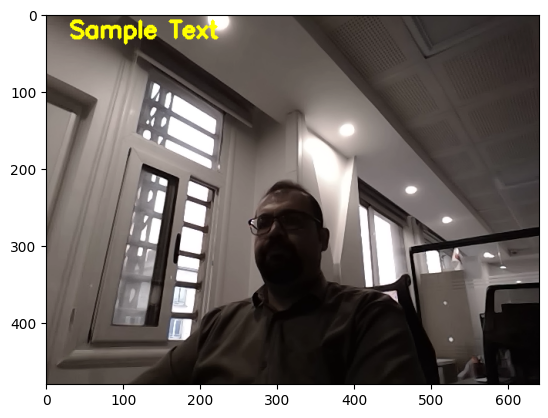

In [7]:
plt.imshow(frame)

In [8]:
def inference(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x, verbose=0);
    result = decode_predictions(preds, top=5) #[0][0][1]
    return result

[[('n04591157', 'Windsor_tie', 0.13237341),
  ('n04418357', 'theater_curtain', 0.12894253),
  ('n04350905', 'suit', 0.0693387),
  ('n03180011', 'desktop_computer', 0.038791496),
  ('n03459775', 'grille', 0.033310376)]]

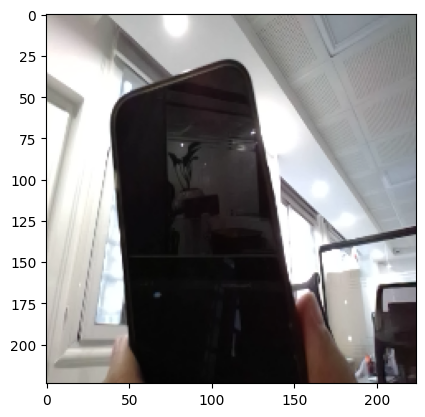

In [16]:
# Watch out top 5 prediction
cap = cv2.VideoCapture(0)
status, frame = cap.read()
frame = cv2.resize(frame, (224, 224))
predicted = inference(frame[...,::-1])

# cv2.putText(frame, predicted, (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), cv2.LINE_4)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
predicted


In [14]:
while True:
    status, frame = cap.read()
    frame = cv2.resize(frame, (224, 224))
    predicted = inference(frame[...,::-1]);
    cv2.putText(frame, predicted, (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), cv2.LINE_4)
    cv2.imshow("Webcam - Object Detection", frame)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()
cap.release

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'putText'
> Overload resolution failed:
>  - Can't convert object to 'str' for 'text'
>  - Can't convert object to 'str' for 'text'
